## Klasifikasi Iris Dataset menggunakan Logistic Regression
Pada modul kali ini, kita akan melakukan klasifikasi untuk dataset iris dengan menggunakan algoritma Regresi Logistik. Adapun prediksi didasarkan pada fitur/karakteristik dari bunga Iris, yaitu: Sepal Length, Sepal Width, Petal Length, Petal Width yang sudah memiliki kelas (species). Kelasnya adalah iris-setosa, iris-virginica, iris-versicolor.

### MODUL REGRESI LOGISTIK
    1. Impor Library/Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

    2. Load Dataset

In [3]:
#membaca dataset
dataset = pd.read_csv("./dataset/Iris.csv")

#Tampilan 5 data teratas
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


    3. Data Preprocessing

In [8]:
dataset.isna().values.any()



False

Pengecekan nilai NaN dilakukan untuk melihat apakah ada data yang tidak memiliki nilai atau NaN. Jika ada, lakukan pengisian terhadap nilai kosong dengan variabel 0. Akan tetapi, pada data ini tertulis false yang berarti semua data memiliki nilai sehingga dapat langsung diproses.

Untuk mempermudah melihat fitur-fitur yang terdapat pada dataset, kita dapat menggunakan fungsi dtypes.

In [7]:
print(dataset.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [9]:
#Splitting Data fitur dan label(target)
X = dataset.iloc[:, :-1] #X = memilih semua fitur kecuali kolom terakhir
y = dataset.iloc[:, -1] #y = memilih target yaitu kolom terakhir

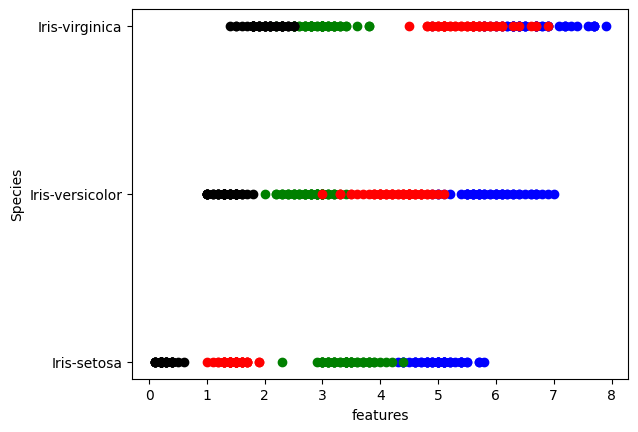

In [16]:
#plotting relasi antara variabel fitur dan tarrget
plt.xlabel("features")
plt.ylabel("Species")

pltX = dataset.loc[:, "SepalLengthCm"]
pltY = dataset.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "blue", label="SepalLengthCm")

pltX = dataset.loc[:, "SepalWidthCm"]
pltY = dataset.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "green", label="SepalWidthCm")

pltX = dataset.loc[:, "PetalLengthCm"]
pltY = dataset.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "red", label="PetalLengthCm")

pltX = dataset.loc[:, "PetalWidthCm"]
pltY = dataset.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "black", label="PetalWidthCm")

    4. Pemisahan data untuk training dan testing
Tahapan selanjutnya adalah melakukan pemisahan data untuk training dan testing. Hal ini diperlukan agar kita bisa melihat bagaimana algoritma belajar untuk melakukan prediksi pada testing data. Kita akan membagi data menjadi 80% training dan 20% testing menggunakan fungsi train_test_split() dari sklearn.model_selection.

In [17]:
#Data dibagi menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    5. Modelling
Pada tahapan ini yang dilakukan adalah mentraining data yang ada menggunakan algoritma logistic regression. Berikut cara membuat dan melatih logistic regression model.

In [18]:
#train the model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Setelah model dilatih, tahapan berikutnya adalah melakukan prediksi untuk melihat bagaimana performa model logistic regression terhadap testing data.

In [19]:
#test the model
predictions = model.predict(X_test)
print(predictions)

print()

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']



    6. Evaluasi Model
Untuk mempermudah dalam melihat performa atau kinerja dari model, kita akan menggunakan beberapa metrics seperti precision, recall, f1-score.

In [20]:
#Mengevaluasi kinerja model dengan metrices precision, recall, f1-score
print(classification_report(y_test, predictions))
print("accuracy: ", accuracy_score(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

accuracy:  1.0
